# Chapter 4

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [14]:
'''
DSC 530
Week 4

Programming Assignment Week 4
Author: Joshua Greenert
Date: 7/1/2022

The numbers generated by random.random are supposed to be uniform between 0
and 1; generate 1000 numbers from random.random and plot their PMF and CDF

Question: Is the distribution uniform?
'''

import numpy as np

In [15]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [16]:
import thinkstats2
import thinkplot

## Examples

One more time, I'll load the data from the NSFG.

In [17]:
import first

live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [18]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

In [19]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [20]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If this is the list of scores.

In [21]:
t = [55, 66, 77, 88, 99]

If you got the 88, your percentile rank is 80.

In [22]:
PercentileRank(t, 88)

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [23]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The median is the 50th percentile, which is 77.

In [24]:
Percentile(t, 50)

Here's a more efficient way to compute percentiles.

In [25]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[int(index)]

Let's hope we get the same answer.

In [26]:
Percentile2(t, 50)

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [27]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In this list

In [28]:
t = [1, 2, 2, 3, 5]

We can evaluate the CDF for various values:

In [29]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

Here's an example using real data, the distribution of pregnancy length for live births.

In [30]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.  For example, 94% of pregnancy lengths are less than or equal to 41.

In [31]:
cdf.Prob(41)

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.  For example, the median is the value that corresponds to 0.5.

In [32]:
cdf.Value(0.5)

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

In [33]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In this example, we can see that first babies are slightly, but consistently, lighter than others.

We can use the CDF of birth weight to compute percentile-based statistics.

In [34]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

Again, the median is the 50th percentile.

In [35]:
median = live_cdf.Percentile(50)
median

The interquartile range is the interval from the 25th to 75th percentile.

In [36]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

We can use the CDF to look up the percentile rank of a particular value.  For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [37]:
live_cdf.PercentileRank(10.2)

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [38]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

The resulting list of ranks should be approximately uniform from 0-1.

In [39]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

In [40]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

This confirms that the random sample has the same distribution as the original data.

## Exercises

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [2]:
import numpy as np
import thinkstats2
import thinkplot

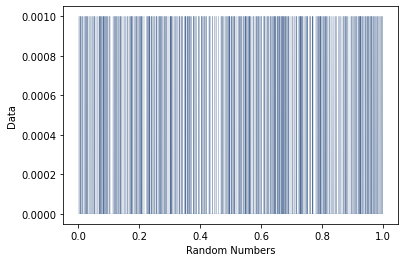

In [3]:
# Generate the random numbers.
sample = np.random.random(1000)

# Create the PMF and the chart
pmf = thinkstats2.Pmf(sample)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel="Random Numbers", ylabel="Data")

The data is uniform according to the charted data.


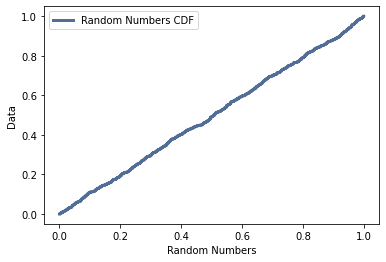

In [4]:
# Create the CDF to compare the chart and see if it's uniform; use sample not the pmf.
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, label="Random Numbers CDF")
thinkplot.Config(xlabel="Random Numbers", ylabel="Data")

print("The data is uniform according to the charted data.")